In [184]:
import pandas as pd
import numpy as np
import sklearn.linear_model as lm
import sklearn.model_selection as model_sel
import datetime as dt 
import matplotlib.pyplot as plt

In [96]:
gas_hr=pd.read_csv('hourly_readings_final.csv');
gas_cor=pd.read_csv('top_correlated_households.csv');

In [97]:
gas_hr.localminute = pd.to_datetime(gas_hr.localminute, infer_datetime_format = True,format = "%Y/%m/%d %I:%M:%S %p");
min_time=min(gas_hr['localminute']);
gas_hr.localminute=gas_hr.localminute.map(lambda x: (x-min_time).total_seconds()/3600.0);



In [ ]:
id_list=gas_hr['dataid'].unique()

In [106]:
normed_gas_hr=pd.DataFrame();
for _id in id_list:
    gas_temp=gas_hr[gas_hr['dataid']==_id];
    min_consumption=min(gas_temp['meter_value']);
    gas_temp.meter_value=gas_temp.meter_value.map(lambda x: x-min_consumption);
    normed_gas_hr=normed_gas_hr.append(gas_temp);

In [216]:
P_array=[];
score=[];
decre_index=0;
id_list1=[871]
for index,item in enumerate(id_list):
    
    #data_temp=data_temp.append(normed_gas_hr[normed_gas_hr['dataid']==item]);
    X_temp=normed_gas_hr[normed_gas_hr['dataid']==item][['localminute']];
    Y_temp=normed_gas_hr[normed_gas_hr['dataid']==item][['meter_value']];
    (X_train, X_test, Y_train, Y_test)=model_sel.train_test_split(X_temp,Y_temp,test_size=0.2);
    
    data_temp=pd.DataFrame()
    cor_list=gas_cor[gas_cor['HH1']==item];
    cor_list=cor_list[cor_list['corr']>0.95]['HH2'];
    for cor_id in cor_list:
        X_train=X_train.append(normed_gas_hr[normed_gas_hr['dataid']==cor_id][['localminute']]);
        Y_train=Y_train.append(normed_gas_hr[normed_gas_hr['dataid']==cor_id][['meter_value']]);
        
    if(len(X_temp)<10):
        decre_index=decre_index+1;
        continue;
    else:
        predictor=lm.LinearRegression();
        predictor=predictor.fit(X_train,Y_train);
        P_array.append(predictor)
        score.append(P_array[index-decre_index].score(X_test,Y_test));

In [217]:
score

[0.98423261169319731,
 0.98412632901111119,
 0.99620774519636801,
 0.96759330135407029,
 0.9647632822597817,
 0.95492409163249048,
 0.97806903059883687,
 0.96157297331275382,
 0.94783416741972315,
 0.94475911260368306,
 0.97718715137288992,
 0.96668903589309829,
 0.96533443255390239,
 0.95820678495988321,
 0.94669379796953745,
 0.96378266490143893,
 0.97146130956750221,
 0.93720420548011196,
 0.95050200249328054,
 0.98240572283484295,
 0.96059035572638651,
 0.94484181679735624,
 0.96597802826117751,
 0.95876976018905546,
 0.81447480058280597,
 0.94833185719665336,
 0.9835772226357461,
 0.94183471496173077,
 0.96800428929741111,
 0.96284781987381585,
 0.96551392975231976,
 0.96024899531941554,
 0.95051806125746352,
 0.96476856853762194,
 0.95885853545830324,
 0.95698614425517214,
 0.95188799927642909,
 0.96314482207827479,
 0.96819954688330179,
 0.93175363663912714,
 0.95984521563063996,
 0.94933682364445071,
 0.93435088542663169,
 0.94002716261849995,
 0.29855957267197186,
 0.971131415

In [222]:
num=0;
for index,item in enumerate(score):
    if(item<0.5):
        temp=gas_hr[gas_hr['dataid']==id_list[index]];
        break
index

44

In [231]:
score[index]

0.29855957267197186

In [232]:
fid=id_list[index]
fid

2470

In [235]:
cor_list=gas_cor[gas_cor['HH1']==fid]
cor_list

,HH1,HH2,corr
220,2470,7017,0.952816
221,2470,5785,0.933782
222,2470,2980,0.928776
223,2470,3527,0.925540
224,2470,9639,0.906758


In [241]:
a=normed_gas_hr[normed_gas_hr['dataid']==fid]
b=normed_gas_hr[normed_gas_hr['dataid']==7017]
c=normed_gas_hr[normed_gas_hr['dataid']==5785]

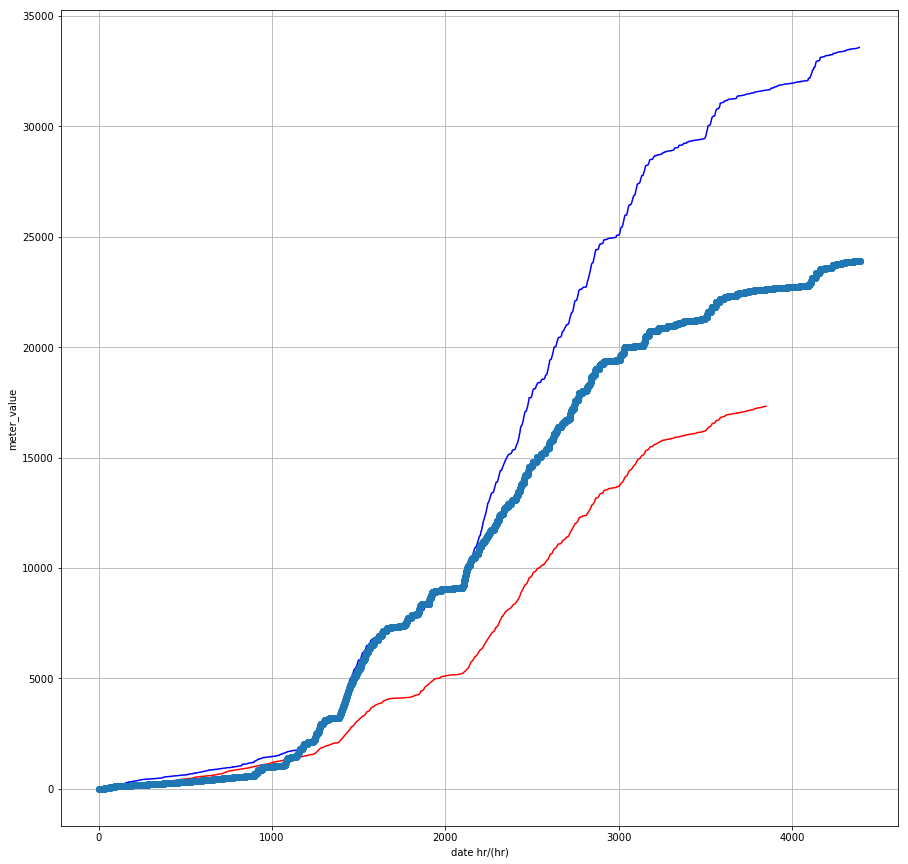

In [242]:
fig=plt.figure(figsize=(15,15));
plt.plot(a.localminute,a.meter_value,'r',b.localminute,b.meter_value,'b',
        c.localminute,c.meter_value,'o');
plt.xlabel('date hr/(hr)');
plt.ylabel('meter_value'),
plt.grid();
plt.show();

In [239]:
a

,localminute,dataid,meter_value
184723,17.0,2470,0
184724,18.0,2470,0
184725,19.0,2470,0
184726,20.0,2470,0
184727,21.0,2470,4
184728,22.0,2470,4
184729,23.0,2470,4
184730,24.0,2470,4
184731,25.0,2470,4
184732,26.0,2470,4


In [243]:
b

,localminute,dataid,meter_value
435951,11.0,7017,0
435952,12.0,7017,0
435953,13.0,7017,0
435954,14.0,7017,6
435955,15.0,7017,14
435956,16.0,7017,14
435957,17.0,7017,14
435958,18.0,7017,14
435959,19.0,7017,14
435960,20.0,7017,16


In [213]:
max(c.localminute)

4391.0000000000009